In [22]:
import pandas as pd
from table_reader import TableReader
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Hey folks, I'm just trying out a proof-of-concept jupyter notebook that uses our data retrieval code.

I got sick of working with environment variables so I switched to a new method to store our DB password:
    1. Create a file called config.json in the project root.
    2. Inside, config.json should look like this:
    {
        "database_url":"database_url_goes_here"
    }

TableReader's other vector methods are geodata_vector() and reviews_vector(). Be sure to call close() when you're done so it terminates the connection to the DB.

In [2]:
tr = TableReader()
df = tr.properties_vector(include_amenitites=True)
print(df.head())
tr.close()

   listingID  accomodates  bathrooms  bedrooms  beds  price  Apartment  \
0       3344            1        1.0       1.0   1.0     48          0   
1       3362           16        3.5       4.0   6.0    433          0   
2       3662            1        1.0       1.0   1.0     65          0   
3       3686            1        1.0       1.0   1.0     55          0   
4       3771            2        1.0       1.0   1.0     88          0   

   Condominium  Guest suite  House  ...  Laptop friendly workspace  \
0            1            0      0  ...                          0   
1            0            0      0  ...                          0   
2            0            0      1  ...                          0   
3            0            0      1  ...                          0   
4            0            0      0  ...                          0   

   Wheelchair accessible  Refrigerator  Carbon monoxide detector  Bathtub  \
0                      0             0                   

In [3]:
df.columns

Index(['listingID', 'accomodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'Apartment', 'Condominium', 'Guest suite', 'House',
       'Serviced apartment', 'Townhouse', 'Entire home/apt', 'Private room',
       'Shared room', 'Keypad', 'Essentials', '24-hour check-in',
       'translation missing: en.hosting_amenity_50', 'Hot water', 'Heating',
       'Indoor fireplace', 'Dog(s)', 'Oven', 'Suitable for events',
       'Safety card', 'Family/kid friendly', 'Doorman', 'Fire extinguisher',
       'Paid parking off premises', 'Other',
       'translation missing: en.hosting_amenity_49', 'Breakfast',
       'Dishes and silverware', 'Smoke detector', 'Cable TV', 'Cat(s)',
       'Private living room', 'Pets allowed', 'Free parking on premises',
       'Buzzer/wireless intercom', 'Dishwasher', 'First aid kit',
       'Free street parking', 'Elevator', 'Wifi', 'Pets live on this property',
       'Pool', 'Host greets you', 'Air conditioning',
       'Extra pillows and blankets', 'Hang

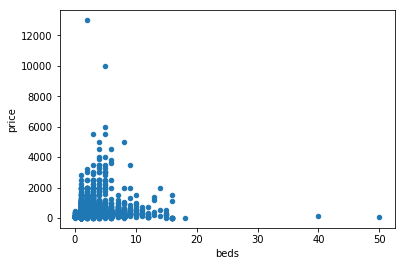

In [4]:
df.plot(x='beds', y='price', kind='scatter')
plt.show()

In [5]:
df['price'].mean()

199.795957497803

In [19]:
maxVal = 15
df['beds'] = df['beds'].where(df['beds'] <= maxVal, maxVal) 

maxVal = 10
df['bathrooms'] = df['bathrooms'].where(df['bathrooms'] <= maxVal, maxVal)

maxVal = 2000
df['price'] = df['price'].where(df['price'] <= maxVal, maxVal) 

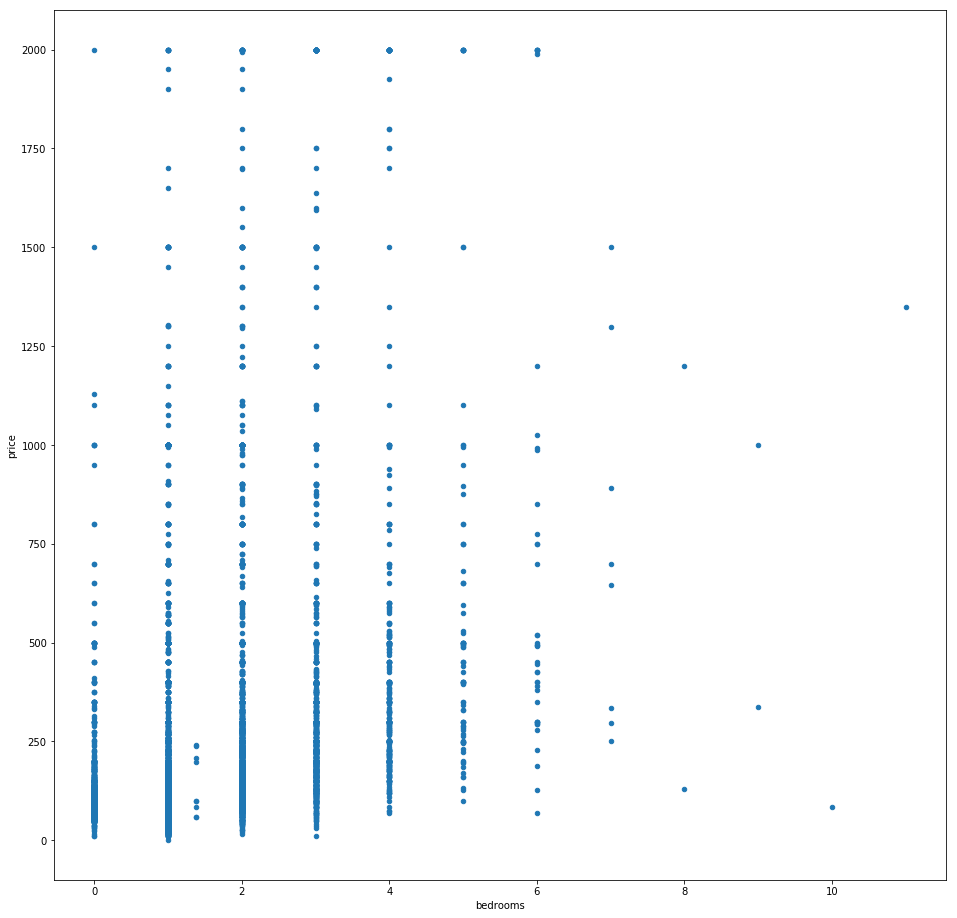

In [33]:

df.plot(x='bedrooms', y='price', kind='scatter', figsize=(16,16))
plt.savefig('bedrooms_scatter.png', dpi=100)
plt.show()

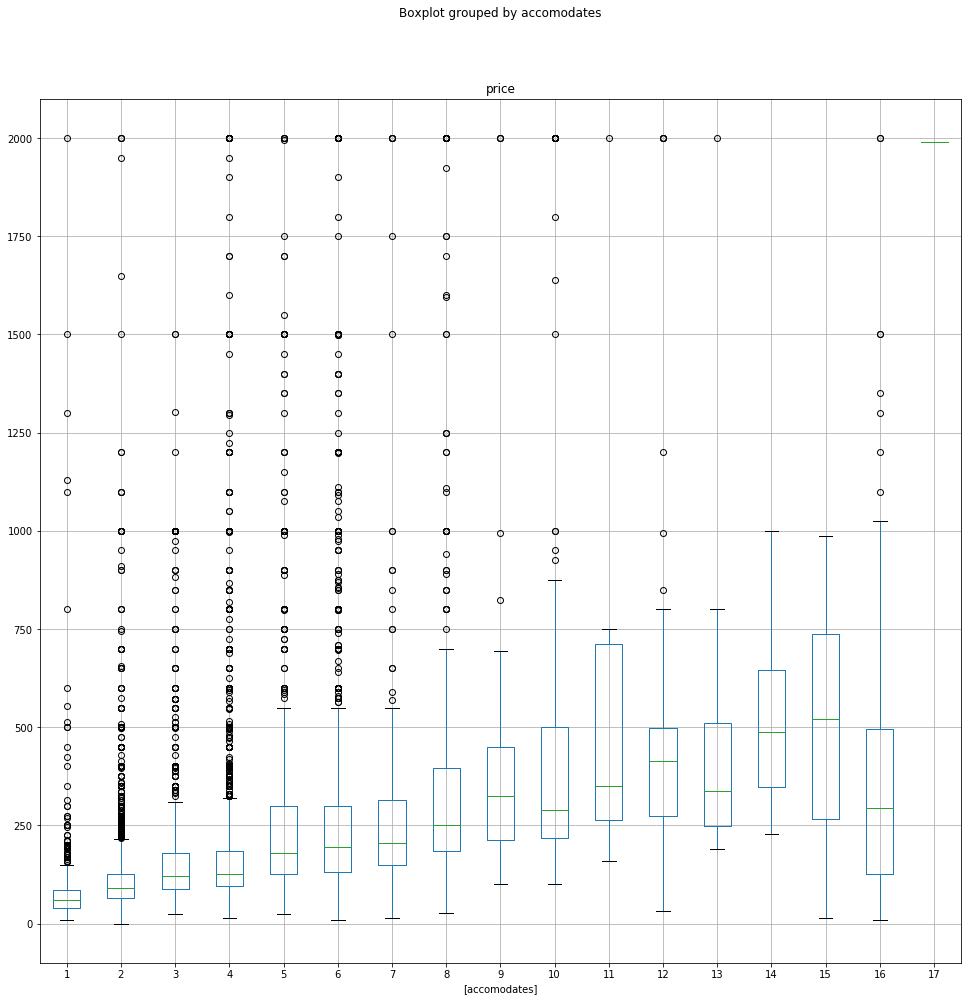

In [45]:
boxplot = df[['accomodates','price']].boxplot(by='accomodates', figsize=(16,16))
plt.savefig('accomodates_box.png', dpi=100)